# Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importar archivos y preparacion de datos

In [2]:
vicitas_df = pd.read_csv('./datasets/visits_log_us.csv')
ordenes_df = pd.read_csv('./datasets/orders_log_us.csv')
costos_df = pd.read_csv('./datasets/costs_us.csv')

In [3]:
print(vicitas_df.info())
print()
print()
vicitas_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None




,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [4]:
# cambio de nombre a columnas
vicitas_df.columns = map(str.lower, vicitas_df.columns)
vicitas_df = vicitas_df.rename(columns = {'end ts':'end_ts', 'source id': 'source_id', 'start ts':'start_ts'})
vicitas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
print(ordenes_df.info())
print()
print()
ordenes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None




,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [6]:
# cambio de nombre a columnas
ordenes_df.columns = map(str.lower, ordenes_df.columns)
ordenes_df = ordenes_df.rename(columns = {'buy ts':'buy_ts'})
ordenes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
ordenes_df['buy_ts'] = pd.to_datetime(ordenes_df['buy_ts'])

In [8]:
print(costos_df.info())
print()
print()
costos_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None




,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [9]:
costos_df['dt'] = pd.to_datetime(costos_df['dt'])
#cambiando el tipo de objeto a fecha

In [10]:
print(vicitas_df.duplicated().sum())
print(ordenes_df.duplicated().sum())
print(costos_df.duplicated().sum())

0
0
0


## Calculo de metricas

### Vicitas

#### ¿Cuántas personas lo usan cada día, semana y mes

In [11]:
vicitas_df['start_ts'] = pd.to_datetime(vicitas_df['start_ts'])
vicitas_df['week']= vicitas_df['start_ts'].astype('datetime64[W]')
vicitas_df['month']= vicitas_df['start_ts'].astype('datetime64[M]')
vicitas_df['day']= vicitas_df['start_ts'].dt.date


vicitas_df_weekly = vicitas_df.groupby('week')[['device', 'source_id', 'uid']].agg({'uid':'nunique'})
vicitas_df_monthly = vicitas_df.groupby('month')[['device', 'source_id', 'uid']].agg({'uid':'nunique'})
vicitas_df_day = vicitas_df.groupby('day')[['device', 'source_id', 'uid']].agg({'uid':'nunique'})

In [12]:
print('El promedio de visitas por semana es:', vicitas_df_weekly['uid'].mean())
print('El promedio de visitas por mes es:', vicitas_df_monthly['uid'].mean())
print('El promedio de visitas por dia es:', vicitas_df_day['uid'].mean())

El promedio de visitas por semana es: 5724.415094339623
El promedio de visitas por mes es: 23228.416666666668
El promedio de visitas por dia es: 907.9917582417582


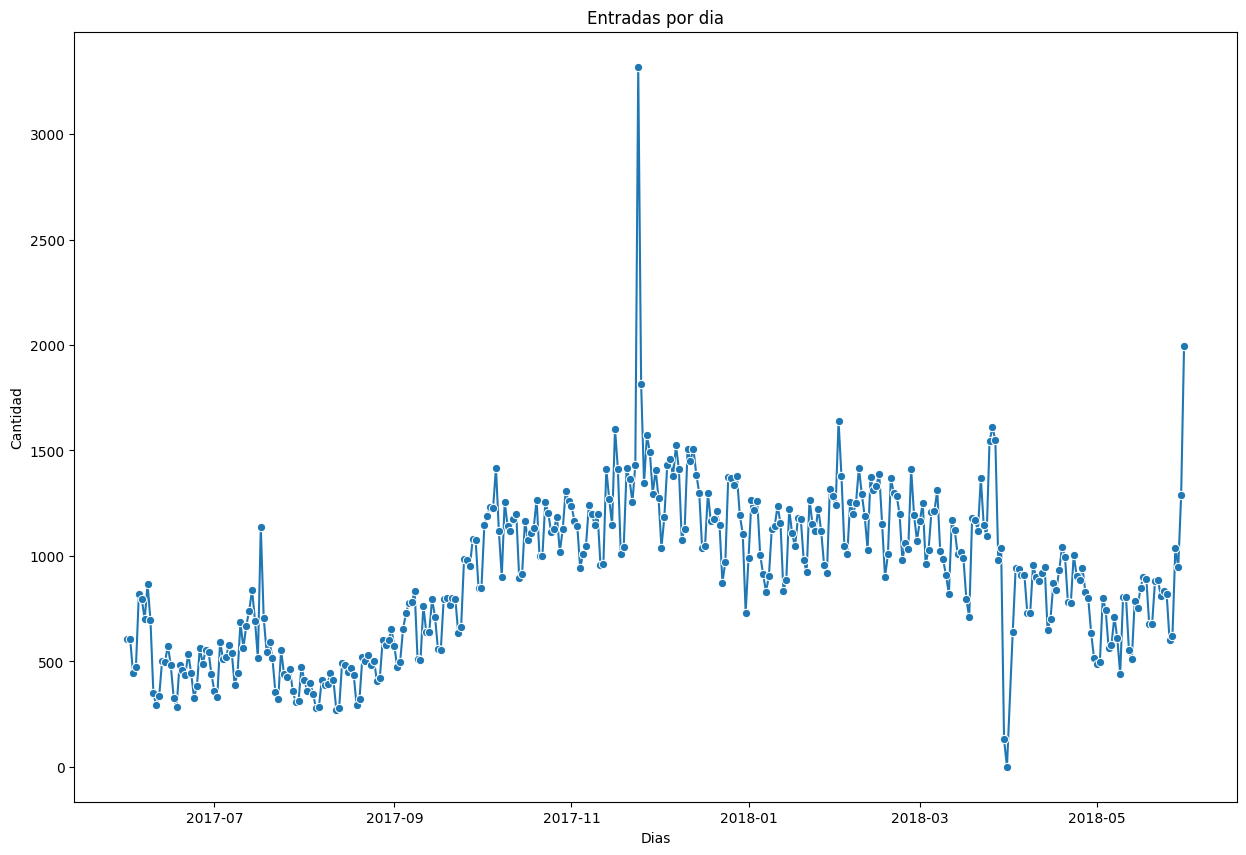

In [13]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='day' , y= 'uid', data= vicitas_df_day, marker='o' )
plt.title('Entradas por dia')
plt.xlabel('Dias')
plt.ylabel('Cantidad')
plt.show()

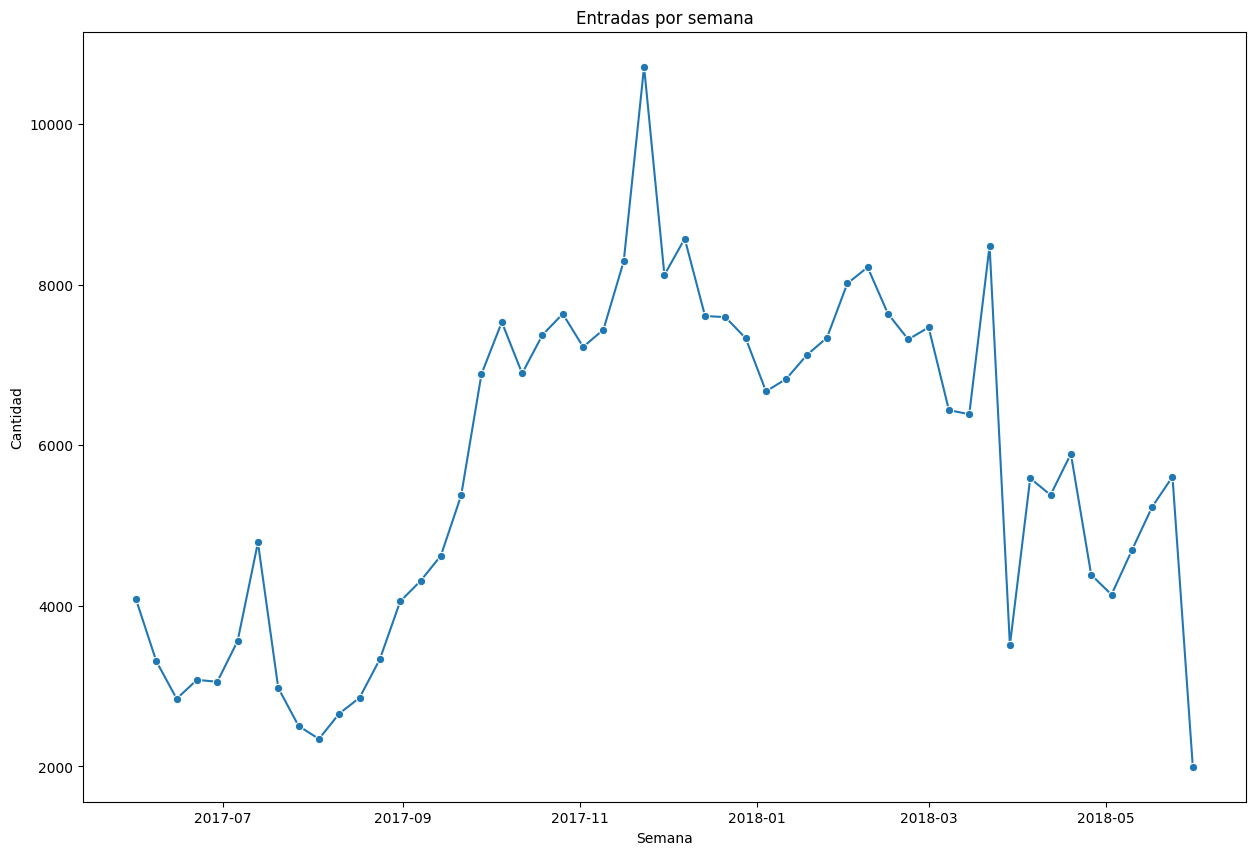

In [14]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='week' , y= 'uid', data= vicitas_df_weekly, marker='o' )
plt.title('Entradas por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.show()

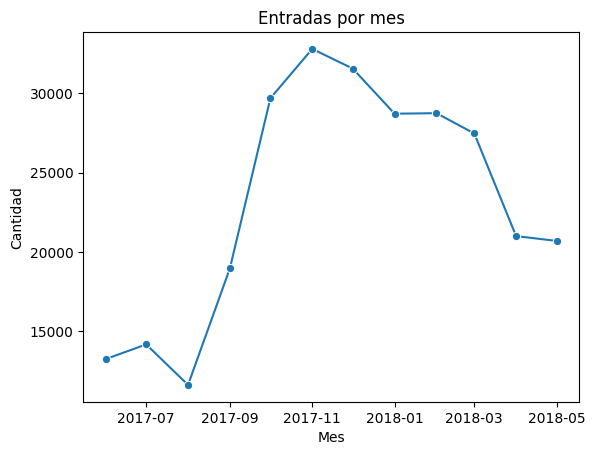

In [15]:
sns.lineplot(x='month' , y= 'uid', data= vicitas_df_monthly, marker='o' )
plt.title('Entradas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

plt.show()

In [16]:
print(vicitas_df['start_ts'].min())
print(vicitas_df['start_ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


#### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [17]:
vicitas_df_por_usuario = pd.pivot_table(vicitas_df, index= ['uid', vicitas_df['start_ts'].dt.date], aggfunc= 'size', fill_value=0).reset_index()

In [18]:
vicitas_df_por_usuario = vicitas_df_por_usuario.rename(columns = {0: 'inicios_de_secion_por_dia'})

In [19]:
vicitas_df_por_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330509 entries, 0 to 330508
Data columns (total 3 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   uid                        330509 non-null  uint64
 1   start_ts                   330509 non-null  object
 2   inicios_de_secion_por_dia  330509 non-null  int64 
dtypes: int64(1), object(1), uint64(1)
memory usage: 7.6+ MB


In [20]:
vicitas_df_por_usuario.head()

,uid,start_ts,inicios_de_secion_por_dia
0,11863502262781,2018-03-01,1
1,49537067089222,2018-02-06,1
2,297729379853735,2017-06-07,1
3,313578113262317,2017-09-18,1
4,313578113262317,2018-02-18,1


In [21]:
print(vicitas_df_por_usuario['inicios_de_secion_por_dia'].min())
print(vicitas_df_por_usuario['inicios_de_secion_por_dia'].max())                                            
print(vicitas_df_por_usuario['inicios_de_secion_por_dia'].mean()) 

1
10
1.0874136559064957


In [22]:
vicitas_df_por_usuario['start_ts'] = pd.to_datetime(vicitas_df_por_usuario['start_ts'])

In [23]:
vicitas_df_por_usuario_ = vicitas_df_por_usuario.groupby('start_ts')['inicios_de_secion_por_dia'].count()


In [24]:
vicitas_df_por_usuario_.reset_index()

,start_ts,inicios_de_secion_por_dia
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


<function matplotlib.pyplot.show(close=None, block=None)>

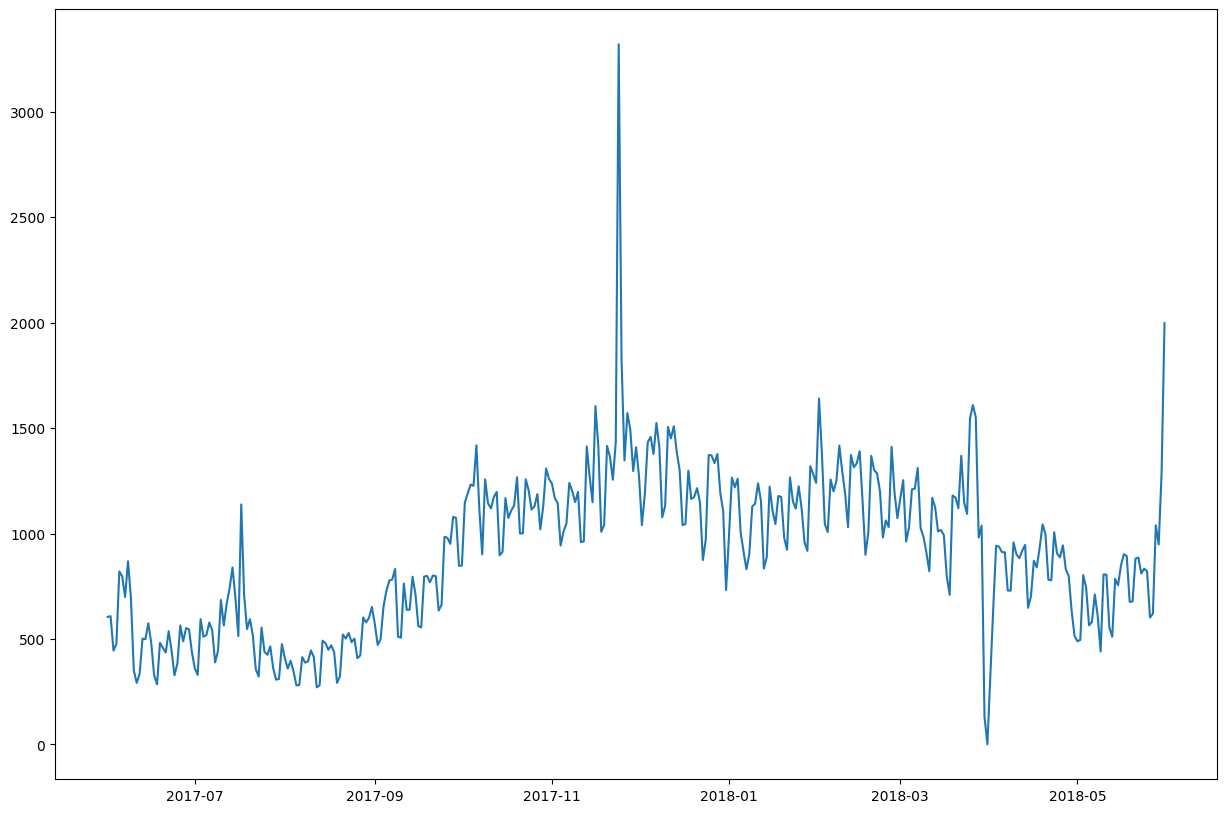

In [25]:
plt.subplots(figsize=(15,10))
plt.plot(vicitas_df_por_usuario_.index, vicitas_df_por_usuario_)
plt.show

###### **podemos darnos cuenta que un usuario inicia secion en un maximo de 10 veces en un solo dia

#### ¿Cuál es la duración de cada sesión?

In [26]:
vicitas_df['end_ts'] = pd.to_datetime(vicitas_df['end_ts'])
vicitas_df_duracion = (vicitas_df['end_ts']- vicitas_df['start_ts']).dt.seconds/3600
vicitas_df_duracion.sort_values(ascending = False)

4181      23.466667
177972    23.233333
229891    11.850000
177381     9.933333
248062     9.133333
            ...    
166165     0.000000
311299     0.000000
311300     0.000000
224011     0.000000
197308     0.000000
Length: 359400, dtype: float64

In [27]:
vicitas_df_duracion.describe()

count    359400.000000
mean          0.178752
std           0.282315
min           0.000000
25%           0.033333
50%           0.083333
75%           0.233333
max          23.466667
dtype: float64

In [28]:
print(vicitas_df_duracion.min())
print(vicitas_df_duracion.max())
print(vicitas_df_duracion.median())
print(vicitas_df_duracion.mode())

0.0
23.466666666666665
0.08333333333333333
0    0.016667
dtype: float64


In [29]:
print(vicitas_df['start_ts'].min())
print(vicitas_df['start_ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


###### ** Este resultado me confunde alguien puede durar mas de 23 horas conectado en una secion. Quiero pensar que la inico y no cerro pero no se encontraba realmente conectado.

#### ¿Con qué frecuencia los usuarios regresan?

In [30]:
vicitas_df.sort_values(['uid','start_ts'])

,device,end_ts,source_id,start_ts,uid,week,month,day
196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018-03-01,2018-03-01,2018-03-01
257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018-02-01,2018-02-01,2018-02-06
173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017-06-01,2017-06-01,2017-06-07
173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017-09-14,2017-09-01,2017-09-18
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-15,2018-02-01,2018-02-18
...,...,...,...,...,...,...,...,...
175259,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,18446424184725333426,2017-11-30,2017-12-01,2017-12-06
293449,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,18446556406699109058,2017-12-28,2018-01-01,2018-01-01
319162,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,18446621818809592527,2017-12-21,2017-12-01,2017-12-27
222173,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,18446621818809592527,2018-05-17,2018-05-01,2018-05-21


In [31]:
def calcular_frecuencia_de_retorno(x):
    if len(x) ==1 or (x['start_ts'].max()-x['start_ts'].min()).days == 0:
        return 0
    else:
        return(len(x)-1)/(x['start_ts'].max()-x['start_ts'].min()).days

frecuencia_de_retorno = vicitas_df.groupby('uid').apply(calcular_frecuencia_de_retorno)
print(frecuencia_de_retorno)

uid
11863502262781          0.000000
49537067089222          0.000000
297729379853735         0.000000
313578113262317         0.011561
325320750514679         0.006757
                          ...   
18446403737806311543    0.000000
18446424184725333426    0.000000
18446556406699109058    0.000000
18446621818809592527    0.006944
18446676030785672386    0.000000
Length: 228169, dtype: float64


In [32]:
print(frecuencia_de_retorno.min())
print(frecuencia_de_retorno.max())

0.0
8.0


In [33]:
vicitas_df['vicit_month'] = vicitas_df['start_ts'].astype('datetime64[M]')

In [34]:
first_vicit = vicitas_df.groupby('uid').agg({'vicit_month':'min'}).reset_index()
first_vicit.columns =['uid','first_vicit_month']

In [35]:
meses_diferencia = pd.merge(vicitas_df, first_vicit, on = 'uid')
meses_diferencia['meses_transcurridos']= meses_diferencia['vicit_month']-meses_diferencia['first_vicit_month']

In [36]:
meses_diferencia['meses_transcurridos']=meses_diferencia['meses_transcurridos'].dt.days//30

In [37]:
meses_diferencia.head(20)

,device,end_ts,source_id,start_ts,uid,week,month,day,vicit_month,first_vicit_month,meses_transcurridos
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-14,2017-12-01,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-15,2018-02-01,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-06-29,2017-07-01,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-17,2018-05-01,2018-05-20,2018-05-01,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-08,2018-03-01,2018-03-09,2018-03-01,2018-03-01,0
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-21,2017-12-01,2017-12-27,2017-12-01,2017-12-01,0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-08-31,2017-09-01,2017-09-03,2017-09-01,2017-09-01,0
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-26,2017-10-01,2017-10-27,2017-10-01,2017-09-01,1
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-08-31,2017-09-01,2017-09-04,2017-09-01,2017-09-01,0
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-26,2017-10-01,2017-10-27,2017-10-01,2017-09-01,1


In [38]:
meses_diferencia_pivot = meses_diferencia.pivot_table(index='first_vicit_month', columns='meses_transcurridos', values= 'uid', aggfunc= 'nunique')

In [39]:
meses_diferencia_pivot

meses_transcurridos,0,1,2,3,4,5,6,7,8,9,10,11
first_vicit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,2032.0,NaN,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
meses_diferencia_pivot_rete = meses_diferencia_pivot.copy()
for col in meses_diferencia_pivot_rete.columns:
    meses_diferencia_pivot_rete[col] = meses_diferencia_pivot_rete[col]/meses_diferencia_pivot[0]

In [41]:

format_frame = {col: "{:.2%}" for col in range(1, 12, 1)} 
format_frame[0] = "{:.0f}" 
( 
    meses_diferencia_pivot_rete
    .style 
    .background_gradient( 
        axis=1, subset=[col for col in range(1, 12)] 
    ).format(format_frame) 
) 

/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


meses_transcurridos,0,1,2,3,4,5,6,7,8,9,10,11
first_vicit_month,,,,,,,,,,,,
2017-06-01 00:00:00,1,7.87%,5.38%,6.14%,6.86%,7.14%,6.10%,5.78%,5.23%,5.08%,4.07%,4.50%
2017-07-01 00:00:00,1,5.61%,5.13%,5.62%,5.82%,4.82%,4.54%,4.57%,3.88%,2.86%,2.75%,nan%
2017-08-01 00:00:00,1,7.69%,6.29%,6.28%,5.01%,4.40%,3.63%,3.95%,2.79%,2.60%,nan%,nan%
2017-09-01 00:00:00,1,8.55%,6.92%,5.07%,3.94%,3.78%,3.59%,2.42%,2.28%,nan%,nan%,nan%
2017-10-01 00:00:00,1,7.86%,5.22%,3.90%,3.43%,3.22%,2.14%,2.04%,nan%,nan%,nan%,nan%
2017-11-01 00:00:00,1,7.83%,4.41%,3.87%,3.37%,2.34%,2.18%,nan%,nan%,nan%,nan%,nan%
2017-12-01 00:00:00,1,5.58%,3.80%,3.11%,2.03%,1.90%,nan%,nan%,nan%,nan%,nan%,nan%
2018-01-01 00:00:00,1,8.98%,nan%,2.50%,2.02%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2018-02-01 00:00:00,1,2.55%,2.01%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


### Vetas 

#### ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)


In [42]:
ordenes_df['order_month'] = ordenes_df['buy_ts'].dt.date
vicitas_df['vicit_month'] = vicitas_df['start_ts'].dt.date

In [43]:
first_orders = ordenes_df.groupby('uid').agg({'order_month':'min'}).reset_index()
first_orders.columns =['uid','first_order_month']
first_vicit = vicitas_df.groupby('uid').agg({'vicit_month':'min'}).reset_index()
first_vicit.columns =['uid','first_vicit_month']

In [44]:
convercion_de_clientes = pd.merge(first_orders, first_vicit, on = 'uid') 

In [45]:
convercion_de_clientes.head()

,uid,first_order_month,first_vicit_month
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24


In [46]:
convercion_de_clientes['tiempo_convercion'] = (convercion_de_clientes['first_order_month'] -convercion_de_clientes['first_vicit_month']).dt.days

In [47]:
convercion_de_clientes.head()

,uid,first_order_month,first_vicit_month,tiempo_convercion
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0


In [48]:
print(convercion_de_clientes['tiempo_convercion'].min())
print(convercion_de_clientes['tiempo_convercion'].max())

0
363


In [49]:
convercion_de_clientes['tiempo_convercion'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: tiempo_convercion, dtype: float64

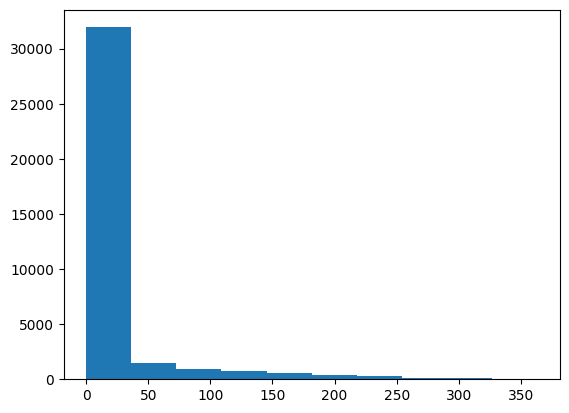

In [50]:
fig, ax = plt.subplots()
ax.hist(convercion_de_clientes['tiempo_convercion'])
plt.show()

###### ** tenmos un tiempo de comvercion maximo de 334 dias aunque podria ser bueno que algunos clientes se  de inmediato realizan su primera compra

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [51]:
clientes_nuevos_por_mes = first_orders.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
clientes_nuevos_por_mes.columns =['first_order_month','numero_de_compradores']

In [52]:
clientes_nuevos_por_mes 

,first_order_month,numero_de_compradores
0,2017-06-01,86
1,2017-06-02,97
2,2017-06-03,57
3,2017-06-04,55
4,2017-06-05,141
...,...,...
359,2018-05-28,129
360,2018-05-29,128
361,2018-05-30,146
362,2018-05-31,492


In [53]:
ordenes_df['periodo'] = pd.to_datetime(ordenes_df['buy_ts']).dt.date
compras_por_periodo = ordenes_df.groupby('periodo')['revenue'].count().reset_index()
compras_por_periodo.columns= ['periodo', 'cantidad_de_compras']

In [54]:
compras_por_periodo

,periodo,cantidad_de_compras
0,2017-06-01,96
1,2017-06-02,111
2,2017-06-03,67
3,2017-06-04,66
4,2017-06-05,161
...,...,...
359,2018-05-28,188
360,2018-05-29,189
361,2018-05-30,208
362,2018-05-31,610


In [55]:
compras_usuario = compras_por_periodo['cantidad_de_compras']/clientes_nuevos_por_mes['numero_de_compradores']

In [56]:
compras_usuario.mean()

1.3735543229796698

#### ¿Cuál es el tamaño promedio de compra?

In [57]:
promedio_de_compra = ordenes_df['revenue'].mean()

In [58]:
print(promedio_de_compra)

4.999646930477041


#### ¿Cuánto dinero traen? (LTV)

In [59]:
ordenes_df_1 = pd.merge(first_orders, ordenes_df, on = 'uid') 
ordenes_df_2 = (ordenes_df_1.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index())
report = pd.merge(ordenes_df_2, clientes_nuevos_por_mes, on ='first_order_month')


In [60]:
margin_rate = 0.4  # fue inventado ya que no viene dado en la informacion de la empresa
report['gp'] = report['revenue'] *margin_rate

In [61]:
report['age'] = (report['order_month']- report['first_order_month'])/ np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [62]:
report['ltv'] = report['gp']/report['numero_de_compradores']

In [63]:
result = report.pivot_table(index= 'first_order_month', columns= 'age', values= 'ltv', aggfunc = 'mean')
result = result.fillna('')
result

age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2017-06-01,0.226628,0.033157,0.021917,0.045124,0.113021,0.035239,0.035271,0.039165,0.025622,0.041116,0.030365,0.044907,0.033088
2017-06-02,0.167076,0.052454,0.035533,0.041753,0.041584,0.028082,0.02934,0.023695,0.019585,0.048893,0.011052,0.034433,0.034763
2017-06-03,0.206546,0.037058,0.064257,0.161431,0.082096,0.042576,0.052819,0.077705,0.059426,0.096842,0.027735,0.009649,0.002105
2017-06-04,0.493636,,,,0.023055,0.014182,,,,,,0.018691,0.011127
2017-06-05,0.139507,0.034206,0.021735,0.059843,0.034197,0.029003,0.02782,0.03548,0.03142,0.026083,0.035001,0.036496,0.039307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-28,0.353008,,,,,,,,,,,,
2018-05-29,0.375906,,,,,,,,,,,,
2018-05-30,0.968438,,,,,,,,,,,,


In [64]:
LTV = (ordenes_df['revenue'].sum()/ordenes_df['uid'].nunique())

In [65]:
LTV 

6.9013279303452615

### Marketing

#### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [66]:
costos_df['month'] = costos_df['dt'].astype('datetime64[M]')
monthly_costs = costos_df.groupby('month').sum()


In [67]:
print('El total gastado es:',monthly_costs['costs'].sum())
print('promedio gastado:',monthly_costs['costs'].mean())

El total gastado es: 329131.61999999994
promedio gastado: 27427.634999999995


In [68]:
monthly_costs.reset_index()
monthly_costs.head(20)

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88
2017-11-01,1020,37907.88
2017-12-01,1054,38315.35
2018-01-01,1054,33518.52
2018-02-01,952,32723.03


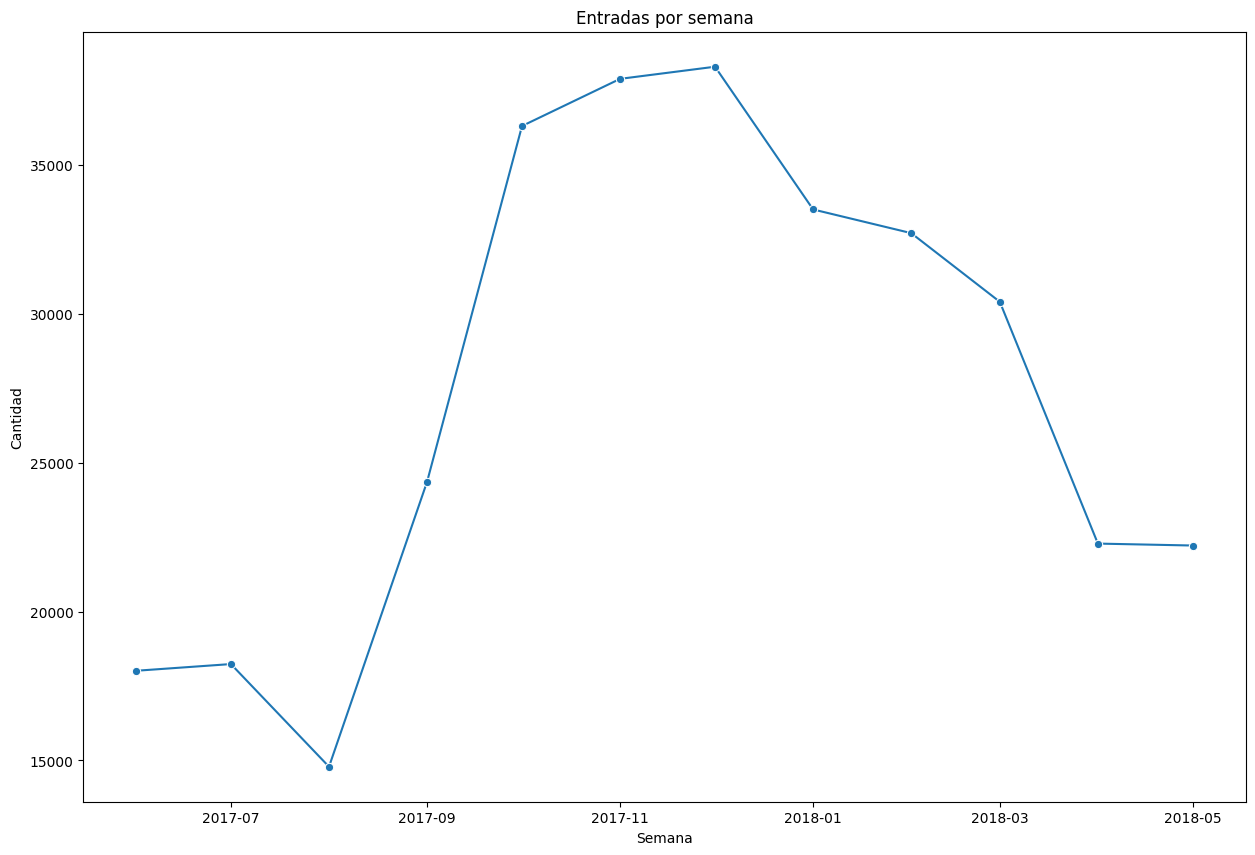

In [69]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='month' , y= 'costs', data= monthly_costs, marker='o' )
plt.title('Entradas por semana')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [70]:
cac = costos_df['costs'].sum()/ordenes_df['uid'].nunique()

In [71]:
cac

9.011626098622786

#### ¿Cuán rentables eran las inversiones? (ROMI)

In [72]:
romi = (ordenes_df['revenue'].sum()/costos_df['costs'].sum())/costos_df['costs'].sum()

In [73]:
romi

2.326804487712207e-06

## conclusiones

###### Al realizar el analisis de marketing, nuestra rentabilidad es muy buena en comparacion con los gastos realizados, por lo tanto nuestra estrategia de tiene buenos resultados y nos dara beneficios futuro, lo que si tenemos que poner mas atencion es en logara que nuestros vicitantes se conviertan en clientes en unperiodo mas corto y satisfactorio.